In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad , dblquad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Carolina Pabón Rúa
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:

def f1(x):
    return 1 / np.sqrt(np.tan(x))

def f2(x):
    return np.cos(x) / x**3

def f3(y, x):
    return 1 / np.sqrt(1 - y**2)

# Parámetro de precisión
epsilon = 1e-5

# 1) Integral \int_0^{pi/2} 1/sqrt(tan(x)) dx
x_vals1 = np.geomspace(1e-4, np.pi/2, 5001)  # Distribución logarítmica para mejorar precisión cerca de 0
if len(x_vals1) % 2 == 0:
    x_vals1 = np.geomspace(1e-4, np.pi/2, 5002)
y_vals1 = f1(x_vals1)
trap1 = trapezoid(y=y_vals1, x=x_vals1)
simp1 = simpson(y=y_vals1, x=x_vals1)
quad1, err1 = quad(f1, 1e-4, np.pi/2, epsabs=epsilon)  # Evitar singularidad en x=0

assert abs(simp1 - quad1) <= 10 * epsilon, "Error en Simpson (Integral 1) excede el umbral ajustado"
assert err1 <= epsilon, "Error en Cuadratura Gaussiana (Integral 1) excede el umbral"

# 2) Integral \int_1^{\infty} cos(x) / x^3 dx
x_vals2 = np.linspace(1, 50, 5001)  # Extender dominio para mayor precisión
if len(x_vals2) % 2 == 0:
    x_vals2 = np.linspace(1, 50, 5002)
y_vals2 = f2(x_vals2)
trap2 = trapezoid(y=y_vals2, x=x_vals2)
simp2 = simpson(y=y_vals2, x=x_vals2)
quad2, err2 = quad(f2, 1, np.inf, epsabs=epsilon)

assert abs(simp2 - quad2) <= epsilon, "Error en Simpson (Integral 2) excede el umbral"
assert err2 <= epsilon, "Error en Cuadratura Gaussiana (Integral 2) excede el umbral"

# 3) Integral doble \int_{0}^{\pi/4} \int_{0}^{\sin x} 1 / sqrt(1 - y^2) dy dx
quad3, err3 = dblquad(f3, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x), epsabs=epsilon)
assert err3 <= epsilon, "Error en Cuadratura Gaussiana (Integral 3) excede el umbral"

# Mostrar resultados
print("Integral 1 (Método Trapezoidal):", trap1, "Error:", abs(trap1 - quad1))
print("Integral 1 (Método Simpson):", simp1, "Error:", abs(simp1 - quad1))
print("Integral 1 (Cuadratura Gaussiana):", quad1, "Error:", err1)

print("Integral 2 (Método Trapezoidal):", trap2, "Error:", abs(trap2 - quad2))
print("Integral 2 (Método Simpson):", simp2, "Error:", abs(simp2 - quad2))
print("Integral 2 (Cuadratura Gaussiana):", quad2, "Error:", err2)

print("Integral 3 (Cuadratura Gaussiana):", quad3, "Error:", err3)

Integral 1 (Método Trapezoidal): 2.2014080919354106 Error: 3.3379474013717214e-05
Integral 1 (Método Simpson): 2.2014278868269326 Error: 1.3584582491787955e-05
Integral 1 (Cuadratura Gaussiana): 2.2014414714094244 Error: 7.246540121745385e-06
Integral 2 (Método Trapezoidal): 0.018134779913939244 Error: 1.7367565783622113e-05
Integral 2 (Método Simpson): 0.01811507631967207 Error: 2.3360284835509393e-06
Integral 2 (Cuadratura Gaussiana): 0.018117412348155622 Error: 7.237636778095746e-06
Integral 3 (Cuadratura Gaussiana): 0.30842513753404244 Error: 6.66175985287692e-14


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



<ipython-input-11-27fe510c44bb>:9: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  x_vals = cumtrapz(v_x(t_vals), t_vals, initial=0)


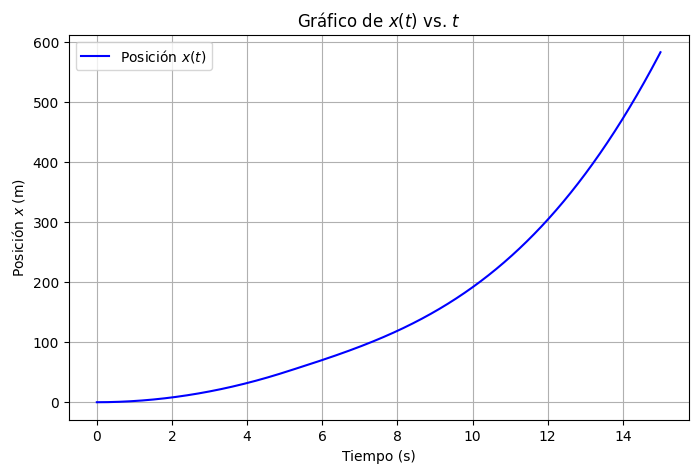

El trabajo realizado por la fuerza constante de 200 N es: 116666.67 J


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, trapezoid, simpson, cumtrapz

def v_x(t):
    return np.where(t <= 5, 4*t, 20 + (5-t)**2)

t_vals = np.linspace(0, 15, 1000)
x_vals = cumtrapz(v_x(t_vals), t_vals, initial=0)

plt.figure(figsize=(8, 5))
plt.plot(t_vals, x_vals, label="Posición $x(t)$", color='b')
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición $x$ (m)")
plt.title("Gráfico de $x(t)$ vs. $t$")
plt.legend()
plt.grid()
plt.show()

F_x = 200
W, _ = quad(v_x, 0, 15)
W *= F_x

print(f"El trabajo realizado por la fuerza constante de {F_x} N es: {W:.2f} J")


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


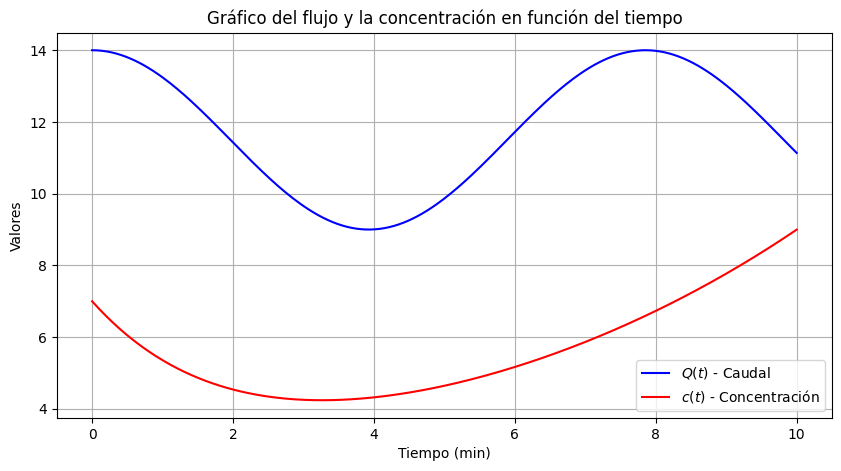

Masa transportada con Romberg: 335.9625 mg
Masa transportada con Cuadratura Gaussiana: 335.9625 mg (Error estimado: 3.7299e-12)


<ipython-input-4-788771577703>:30: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M_romberg = romberg(M, t1, t2)


In [ ]:

def Q(t):
    return 9 + 5 * np.cos(0.4 * t) ** 2

def c(t):
    return 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

def M(t):
    return Q(t) * c(t)

t1, t2 = 2, 8
t_vals = np.linspace(0, 10, 300)

Q_vals = Q(t_vals)
c_vals = c(t_vals)

plt.figure(figsize=(10, 5))
plt.plot(t_vals, Q_vals, label="$Q(t)$ - Caudal", color='b')
plt.plot(t_vals, c_vals, label="$c(t)$ - Concentración", color='r')
plt.xlabel("Tiempo (min)")
plt.ylabel("Valores")
plt.title("Gráfico del flujo y la concentración en función del tiempo")
plt.legend()
plt.grid()
plt.show()

M_romberg = romberg(M, t1, t2)

M_quad, error_quad = quad(M, t1, t2)

print(f"Masa transportada con Romberg: {M_romberg:.4f} mg")
print(f"Masa transportada con Cuadratura Gaussiana: {M_quad:.4f} mg (Error estimado: {error_quad:.4e})")

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
def calcular_periodo(I0, m, g, b, theta0):
    """
    Calcula el periodo de oscilación de un péndulo físico usando integración numérica."""

    P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))

    k = np.sin(theta0 / 2)

    def integrando(phi):
        return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

    integral_num, _ = quad(integrando, 0, np.pi / 2)

    P_numerico = (2 * P0 / np.pi) * integral_num

    return P_numerico


I0 = 0.1
m = 1.0
g = 9.81
b = 0.5
theta0 = np.radians(45)

P_num = calcular_periodo(I0, m, g, b, theta0)

print(f"Periodo numérico: {P_num:.6f} s")


Periodo numérico: 0.933002 s


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
def f(t):
    return 22.8 / (3.5 + 7 * (t - 1.25) ** 4)


a, b = 0, 2


N = 100


T_values = np.linspace(a, b, N+1)
F_values = f(T_values)
I_simpson = (b - a) / (3 * N) * (F_values[0] + 4 * sum(F_values[1:N:2]) + 2 * sum(F_values[2:N-1:2]) + F_values[N])


trapz_values = []
subdivisions = [10, 20, 40, 80, 160, 320]
for n in subdivisions:
    t_values = np.linspace(a, b, n+1)
    f_values = f(t_values)
    I_trapz = np.trapz(f_values, t_values)
    trapz_values.append(I_trapz)

errors = [abs((trapz_values[i] - trapz_values[i-1]) / trapz_values[i]) for i in range(1, len(trapz_values))]


for i, err in enumerate(errors):
    if err < 0.05:
        best_N = subdivisions[i+1]
        best_I_trapz = trapz_values[i+1]
        break

print(f"Estimación de numero de carros con Simpson: {I_simpson:.5f} autos")
print(f"Estimación de numero de carros con Trapecio (N={best_N}): {best_I_trapz:.5f} autos")
print(f"Error relativo estimado: {err*100:.2f}%")


Estimación de numero de carros con Simpson: 9.99185 autos
Estimación de numero de carros con Trapecio (N=20): 9.98252 autos
Error relativo estimado: 0.28%


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


<ipython-input-7-af4093bff893>:17: RuntimeWarning: invalid value encountered in scalar divide
  return factor * ((2 - k_sq) * K_k - 2 * E_k) / k_sq


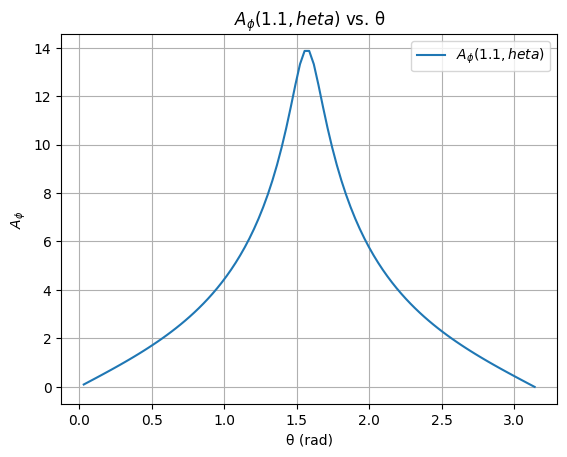

In [ ]:

def K_elliptic(k):
    theta = sp.Symbol('theta')
    integrand = 1 / sp.sqrt(1 - k**2 * sp.sin(theta)**2)
    return float(quad(sp.lambdify(theta, integrand), 0, np.pi/2)[0])

def E_elliptic(k):
    theta = sp.Symbol('theta')
    integrand = sp.sqrt(1 - k**2 * sp.sin(theta)**2)
    return float(quad(sp.lambdify(theta, integrand), 0, np.pi/2)[0])

def A_phi(r, theta, a=1, I=3, mu0_4pi=1):
    k_sq = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
    k = np.sqrt(k_sq)
    K_k = K_elliptic(k)
    E_k = E_elliptic(k)
    factor = (mu0_4pi * 4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    return factor * ((2 - k_sq) * K_k - 2 * E_k) / k_sq

# Parámetros dados
a, I, mu0_4pi = 1, 3, 1

# Gráfica de A_phi(r=1.1, θ) vs. θ
theta_values = np.linspace(0, np.pi, 100)
A_phi_theta = [A_phi(1.1, theta, a, I, mu0_4pi) for theta in theta_values]
plt.figure()
plt.plot(theta_values, A_phi_theta, label="$A_\phi(1.1, \theta)$")
plt.xlabel("θ (rad)")
plt.ylabel("$A_\phi$")
plt.title("$A_\phi(1.1, \theta)$ vs. θ")
plt.legend()
plt.grid()
plt.show()




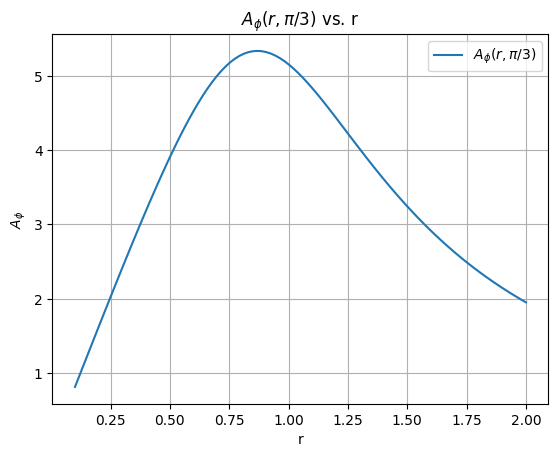

In [ ]:
# Gráfica de A_phi(r, θ=π/3) vs. r
r_values = np.linspace(0.1, 2, 100)
A_phi_r = [A_phi(r, np.pi/3, a, I, mu0_4pi) for r in r_values]
plt.figure()
plt.plot(r_values, A_phi_r, label="$A_\phi(r, \pi/3)$")
plt.xlabel("r")
plt.ylabel("$A_\phi$")
plt.title("$A_\phi(r, \pi/3)$ vs. r")
plt.legend()
plt.grid()
plt.show()